In [11]:
words = open('names.txt', 'r').read().splitlines()

In [12]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [13]:
b ={} #dict for count statistics
for w in words: # pairwise generation
    chs = ['<S>'] + list(w) + ['<S>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)   #bigram as the key
        b[bigram] = b.get(bigram, 0) + 1 # counting the occurance
       
    

In [39]:
sorted(b.items(), key = lambda kv:-kv[1]) # sorting by the values

[(('n', '<S>'), 6763),
 (('a', '<S>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<S>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<S>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<S>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<S>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [15]:
import torch

In [50]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [51]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0


In [52]:

for w in words: # pairwise generation
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
       
    

In [53]:
itos = {i:s for s, i in stoi.items()}

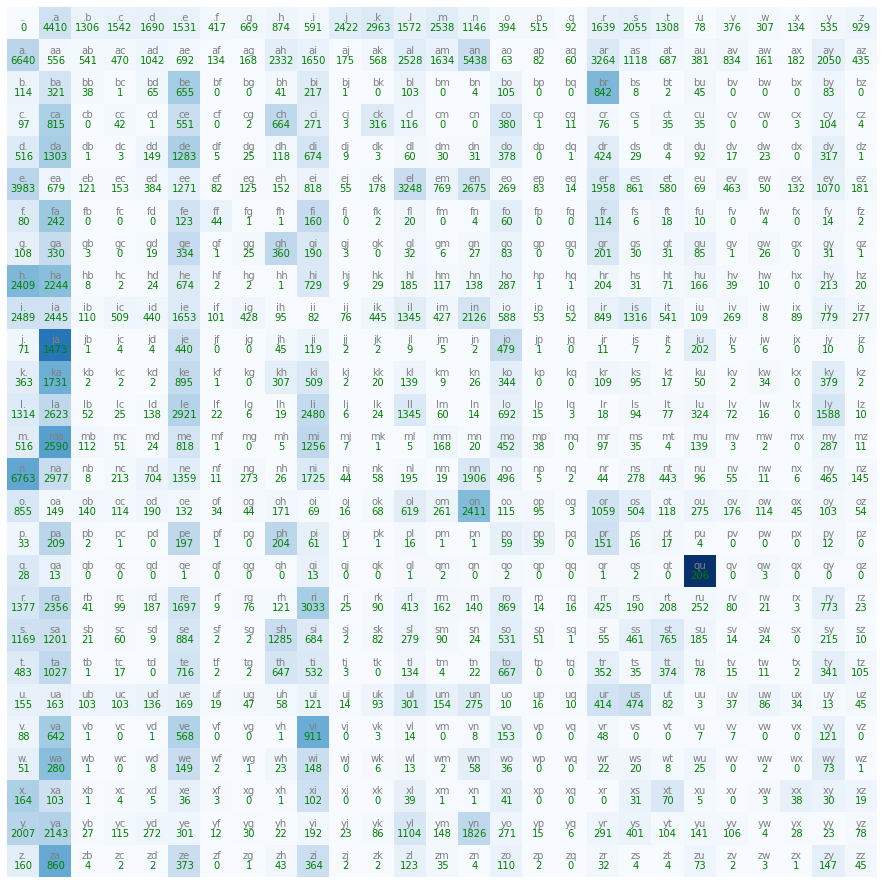

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(P, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='green')
plt.axis('off');


In [59]:
p = N[0].float()
p = p / p.sum() #normalized the data to probability

p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [77]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [75]:
g = torch.Generator().manual_seed(2147483647)                                 
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [87]:
P = N.float()

In [88]:
P.shape

torch.Size([27, 27])

In [91]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [92]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [120]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [121]:
g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    out = []
    ix = 0

    while True:
        p = N[ix].float()
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [122]:
#goal: maximize likelihood of hte data w.r.t. model parameters (statistical modeling)
#equivalent to maximizing the log likelihood (becasue log is monotonic)
#equivalent to minimizing the negative log likelihood
#equivalent to minimizing the average negative log likelihood

n = 0.0
log_likelihood = 0.0
for w in ['andrejq']: # pairwise generation
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob: .4f} {logprob}')
        
print(f'{log_likelihood=}')   
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}') #loss value #(averaging)

.a:  0.1376 -1.983507752418518
an:  0.1604 -1.8301737308502197
nd:  0.0384 -3.2594051361083984
dr:  0.0770 -2.564587354660034
re:  0.1334 -2.0142745971679688
ej:  0.0027 -5.900386333465576
jq:  0.0003 -7.981733322143555
q.:  0.0970 -2.3331477642059326
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


In [130]:
# create the training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [128]:
xs

tensor([ 0,  5, 13, 13,  1])

In [129]:
ys

tensor([ 5, 13, 13,  1,  0])

In [136]:
import torch.nn.functional as F


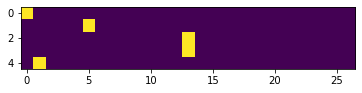

In [137]:
plt.imshow(xenc)

In [138]:
xenc.dtype

torch.float32

In [154]:
W = torch.randn((27,27))
xenc @ W  #martrix multplication in PYtorch

tensor([[ 1.7847e-01,  2.4970e+00,  7.2406e-01, -3.5566e-01,  3.1011e-01,
          8.8290e-02, -1.5867e-01, -4.2424e-02, -2.2824e-01,  3.9149e-01,
          1.0266e+00,  1.8428e+00, -7.4750e-01, -1.3213e+00, -8.3624e-01,
         -4.3334e-01,  2.0650e+00, -2.4169e-01, -3.6847e-01, -5.9866e-01,
          1.6077e-01,  8.8487e-01, -1.4227e-01,  1.0775e+00,  2.5800e-01,
         -1.2663e-03, -6.7308e-01],
        [ 1.9612e-01, -1.2448e+00,  1.5780e+00,  1.5413e+00,  2.3626e-01,
         -1.8235e+00, -5.9816e-01, -6.6812e-01,  6.4176e-01, -1.0017e+00,
         -2.7764e-01,  3.0286e-01,  4.7666e-01,  2.4047e-01, -8.5016e-01,
         -1.4105e+00, -4.9702e-01, -8.0018e-01,  8.6867e-01, -1.3048e+00,
         -6.6217e-01, -2.0320e+00,  4.3193e-01,  1.1245e+00,  1.1217e+00,
          7.8204e-01, -4.2711e-01],
        [-3.8850e-01,  1.3205e+00,  4.4306e-01, -4.6531e-02, -1.3856e+00,
         -2.1898e-01,  3.3719e-01,  1.7140e-01, -3.9837e-01,  5.9329e-01,
          1.4054e+00,  6.3854e-01, -1.73

In [156]:
#forwarding pass
xenc = F.one_hot(xs, num_classes=27).float() #input to the network: one-hot encoding
logits = xenc @W # predict log-counts
counts = (xenc @ W).exp() #counts, equivalent N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
probs
#btw: the last 2 lines here are together called 'softmax'

tensor([[0.0223, 0.2262, 0.0384, 0.0131, 0.0254, 0.0203, 0.0159, 0.0179, 0.0148,
         0.0275, 0.0520, 0.1176, 0.0088, 0.0050, 0.0081, 0.0121, 0.1469, 0.0146,
         0.0129, 0.0102, 0.0219, 0.0451, 0.0162, 0.0547, 0.0241, 0.0186, 0.0095],
        [0.0335, 0.0079, 0.1334, 0.1286, 0.0349, 0.0044, 0.0151, 0.0141, 0.0523,
         0.0101, 0.0209, 0.0373, 0.0443, 0.0350, 0.0118, 0.0067, 0.0167, 0.0124,
         0.0656, 0.0075, 0.0142, 0.0036, 0.0424, 0.0847, 0.0845, 0.0602, 0.0180],
        [0.0155, 0.0854, 0.0355, 0.0218, 0.0057, 0.0183, 0.0320, 0.0271, 0.0153,
         0.0413, 0.0930, 0.0432, 0.0040, 0.0172, 0.0885, 0.0091, 0.0237, 0.1675,
         0.0584, 0.0255, 0.0030, 0.0251, 0.0038, 0.0147, 0.0232, 0.0051, 0.0972],
        [0.0155, 0.0854, 0.0355, 0.0218, 0.0057, 0.0183, 0.0320, 0.0271, 0.0153,
         0.0413, 0.0930, 0.0432, 0.0040, 0.0172, 0.0885, 0.0091, 0.0237, 0.1675,
         0.0584, 0.0255, 0.0030, 0.0251, 0.0038, 0.0147, 0.0232, 0.0051, 0.0972],
        [0.0551, 0.0184,

In [163]:
nlls = torch.zeros(5)
for i in range(5):
    #i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', nll.item())
    nlls[i] = nll
    
    print('=======')
    print('average negative log likelihood, i.e. loss=', nlls.mean().item())

--------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0223, 0.2262, 0.0384, 0.0131, 0.0254, 0.0203, 0.0159, 0.0179, 0.0148,
        0.0275, 0.0520, 0.1176, 0.0088, 0.0050, 0.0081, 0.0121, 0.1469, 0.0146,
        0.0129, 0.0102, 0.0219, 0.0451, 0.0162, 0.0547, 0.0241, 0.0186, 0.0095])
label (actual next character): 5
probability assigned by the net to the correct character: 0.020343663170933723
log likelihood: 27.867216110229492
average negative log likelihood, i.e. loss= 5.573443412780762
--------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0335, 0.0079, 0.1334, 0.1286, 0.0349, 0.0044, 0.0151, 0.0141, 0.0523,
        0.0101, 0.0209, 0.0373, 0.0443, 0.0350, 0.0118, 0.0067, 0.0167, 0.0124,
        0.0656, 0.0075, 0.0142, 0.0036, 0.0424, 0.0847, 0.0845, 0.0602, 0.0180])
label (actual next character): 13
probability assigned by the net to the correct

In [177]:
xs

tensor([ 0,  5, 13, 13,  1])

In [178]:
ys

tensor([ 5, 13, 13,  1,  0])

In [186]:
#randomly initialize 27 neurons' weigths. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [203]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [204]:
loss

tensor(3.7092, grad_fn=<NegBackward0>)

In [200]:
#backward pass
W.grad = None # s``et to zero the gradient
loss.backward()

In [201]:
W.grad.shape

torch.Size([27, 27])

In [202]:
#update parameter W
W.data += -0.1 * W.grad